# Optimziation Project 1
## Fall 2021
### Authors: Alex Cooper(), Conoly Cravens (mcc4443), Anant Gupta (), Ayush Malani ()

In [3]:
import numpy as np
import gurobipy as gp
import pandas as pd

In [4]:
# Reading in CSV originally
ROI = pd.read_csv('ROI_data.csv')  
ROI.set_index('Platform',inplace=True)

### Formulate the marketing budget allocation problem as a linear program.  Use gurobi to find the optimal budget allocation.

In [5]:
## SETTING UP LP PROBLEM
obj = np.array(list(ROI.iloc[0])) # objective vector
A = np.zeros((13,10)) # initialize constraint matrix
A[0:10,:] = np.diag(np.ones(10)) # the amount invested should be no more than $3M
A[10,:] = [1] # total amount cannot exceed $10M
A[11,:] = [1,1,0,0,-1,0,0,0,0,-1] #print and TV should be no more than the amount spent on Facebook and Email
A[12,:] = [0,0,2,2,-1,-1,-1,-1,-1,0] #total amount used in social media should be at least twice of SEO and AdWords
b = np.array([3,3,3,3,3,3,3,3,3,3,10,0,0]) 
sense = np.array(['<']*13) 

In [6]:
## SETTING UP GUROBI MODEL
aModel = gp.Model() # initialize an empty model

aModX = aModel.addMVar(10) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints

aModCon = aModel.addMConstrs(A, aModX, sense, b) # add the constraints to the model

aModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model...

aModel.Params.OutputFlag = 0 # tell gurobi to shut up!!

Academic license - for non-commercial use only - expires 2022-09-15
Using license file C:\Users\ayush\gurobi.lic


In [7]:
aModel.optimize() # solve the LP

In [8]:
print('The maxiumum return using consulting firm 1 ROI estimates is', aModel.objVal, '(Million Dollars).')

The maxiumum return using consulting firm 1 ROI estimates is 0.45600000000000007 (Million Dollars).


In [9]:
# Make allocations into DF for presentation
parta = aModX.x 
results = pd.DataFrame(parta).T
results.columns = ['Print','TV','SEO','Adwords','Facebook','LinkedIn','Instagram','Snapchat','Twitter','Email']
results.index = ["Using Firm 1's estimations"]
print('Optimal Allocations:')
print('Note: all values in million dollars')
results

Optimal Allocations:
Note: all values in million dollars


,Print,TV,SEO,Adwords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Using Firm 1's estimations,0.0,3.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,3.0


<AxesSubplot:ylabel="Using Firm 1's estimations">

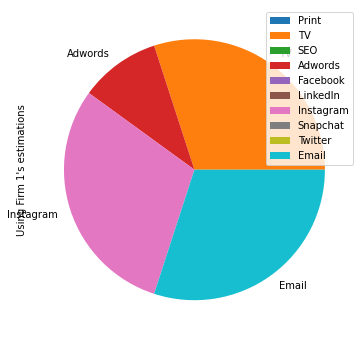

In [35]:
# Add pie chart for visulalization
results.T.plot.pie(y="Using Firm 1's estimations",figsize=(10, 6))

##### Check

In [11]:
printa = parta[0]
TVa = parta[1]
SEOa = parta[2]
AWa = parta[3]
FBa = parta[4]
LIa = parta[5]
IGa = parta[6]
SCa = parta[7]
TWa = parta[8]
Ea = parta[9]

In [12]:
print("Constraint: print and TV should be no more than the amount spent on Facebook and Email")
printa + TVa <= FBa + Ea

Constraint: print and TV should be no more than the amount spent on Facebook and Email


True

In [13]:
print("Constraint: total amount used in social media should be at least twice of SEO and AdWords")
2*(SEOa + AWa)<= FBa + LIa + IGa+ SCa+TWa

Constraint: total amount used in social media should be at least twice of SEO and AdWords


True

### Your boss is happy to see the promising results presented by the marketing department. However, your boss is also very concerned because your boss recalls being somewhat disappointed after following such recommendations in the past. To be cautious about the decision, your team has decided to get another opinion about the ROI data and rerun the analysis.  The second consulting firm returns the estimates of the ROI data in the table below (also in the CSV file mentioned above).  You are asked to compare the two optimal allocations from these two ROI estimates.  

In [14]:
## SET UP SECOND LP PROBLEM
obj2 = np.array(list(ROI.iloc[1])) # objective vector
A2 = np.zeros((13,10)) # initialize constraint matrix
A2[0:10,:] = np.diag(np.ones(10)) # the amount invested should be no more than $3M
A2[10,:] = [1] # total amount cannot exceed $10M
A2[11,:] = [1,1,0,0,-1,0,0,0,0,-1] #print and TV should be no more than the amount spent on Facebook and Email
A2[12,:] = [0,0,2,2,-1,-1,-1,-1,-1,0] #total amount used in social media should be at least twice of SEO and AdWords
b2 = np.array([3,3,3,3,3,3,3,3,3,3,10,0,0]) 
sense = np.array(['<']*13) 

In [15]:
## SET UP GUROBI MODEL
bModel = gp.Model() # initialize an empty model

bModX = bModel.addMVar(10) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints

bModCon = bModel.addMConstrs(A2, bModX, sense, b2) # add the constraints to the model

bModel.setMObjective(None,obj2,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model...

bModel.Params.OutputFlag = 0 # tell gurobi to shut up!!

In [16]:
bModel.optimize() # solve the LP

In [17]:
print('The maxiumum return using consulting firm 2 ROI estimates is', bModel.objVal, '(Million Dollars).')

The maxiumum return using consulting firm 2 ROI estimates is 0.45600000000000007 (Million Dollars).


In [18]:
# Make allocations into DF for presentation
partb = bModX.x 
results2 = pd.DataFrame(partb).T
results2.columns = ['Print','TV','SEO','Adwords','Facebook','LinkedIn','Instagram','Snapchat','Twitter','Email']
results2.index = ["Using Firm 2's estimations"]
print('Optimal Allocations:')
print('Note: all values in million dollars')
results2

Optimal Allocations:
Note: all values in million dollars


,Print,TV,SEO,Adwords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Using Firm 2's estimations,3.0,0.0,0.0,1.0,3.0,3.0,0.0,0.0,0.0,0.0


<AxesSubplot:ylabel="Using Firm 2's estimations">

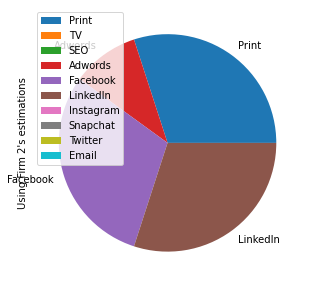

In [19]:
# Add pie chart for visulalization
results2.T.plot.pie(y="Using Firm 2's estimations",figsize=(5, 5))

##### Check

In [20]:
printb = partb[0]
TVb = partb[1]
SEOb = partb[2]
AWb = partb[3]
FBb = partb[4]
LIb = partb[5]
IGb = partb[6]
SCb = partb[7]
TWb = partb[8]
Eb = partb[9]

In [21]:
print("Constraint: print and TV should be no more than the amount spent on Facebook and Email")
printb + TVb <= FBb + Eb

Constraint: print and TV should be no more than the amount spent on Facebook and Email


True

In [22]:
print("Constraint: total amount used in social media should be at least twice of SEO and AdWords")
2*(SEOb + AWb)<= FBb + LIb + IGb+ SCb+TWb

Constraint: total amount used in social media should be at least twice of SEO and AdWords


True

### Are the allocations the same?  Assuming the first ROI data is correct, if you were to use the second allocation (the allocation that assumed the second ROI data was correct) how much lower would the objective be relative to the optimal objective (the one that uses the first ROI data and the first allocation)?  Assuming the second ROI data is correct, if you used the first allocation how much lower would the objective be relative to the optimal objective?  Do you think the third constraint above, based on your boss’ experience, is useful?

In [23]:
# Comparing allocation DFs
optimalDF = pd.DataFrame({'Category': ['Print','TV','SEO','Adwords','Facebook','LinkedIn','Instagram','Snapchat','Twitter','Email'],
              'Using Firm A ROI': parta,
              'Using Firm B ROI': partb
})
optimalDF.set_index('Category',inplace=True)
print('The optimal values for each cateogry are NOT the same:')
print('Note: all values in million dollars')
optimalDF

The optimal values for each cateogry are NOT the same:
Note: all values in million dollars


,Using Firm A ROI,Using Firm B ROI
Category,,
Print,0.0,3.0
TV,3.0,0.0
SEO,0.0,0.0
Adwords,1.0,1.0
Facebook,0.0,3.0
LinkedIn,0.0,3.0
Instagram,3.0,0.0
Snapchat,0.0,0.0
Twitter,0.0,0.0


In [24]:
print('Assuming the first ROI data is correct but using the second allocation the objective would be',
      sum(obj * partb) - aModel.objVal,'(million $) lower than the optimal objective.')

Assuming the first ROI data is correct but using the second allocation the objective would be -0.20400000000000007 (million $) lower than the optimal objective.


In [25]:
print('Assuming the second ROI data is correct but using the first allocation the objective would be',
      sum(obj2 * parta) - bModel.objVal,'(million $) lower than the optimal objective.')

Assuming the second ROI data is correct but using the first allocation the objective would be -0.19200000000000006 (million $) lower than the optimal objective.


The third constraint (individual allocations must be $\leq$ $3M), distributes money more evenly making investments less risky.

###   To explore this further perform some analysis of how your optimal allocation would change based on changes in the ROI data.  Use the first ROI data as your starting point.  By how much could each advertising medium’s ROI increase or decrease and still result in the same optimal allocation you found in step (3)?

In [26]:
#Sensitivity analysis in DF
sensitivity = pd.DataFrame({'Category': ['Print','TV','SEO','Adwords','Facebook','LinkedIn','Instagram','Snapchat','Twitter','Email'],
                            'Starting': obj,
                            'Upper Sensitivity': aModel.SAObjUp,
                            'Lower Sensitivity': aModel.SAObjLow
    
})
sensitivity.set_index('Category', inplace = True)
print("Sensitivity Analysis")
sensitivity

Sensitivity Analysis


,Starting,Upper Sensitivity,Lower Sensitivity
Category,,,
Print,0.031,0.049,-inf
TV,0.049,0.062,0.039
SEO,0.024,0.039,-inf
Adwords,0.039,0.046,0.033
Facebook,0.016,0.029,-inf
LinkedIn,0.024,0.039,-inf
Instagram,0.046,inf,0.039
Snapchat,0.026,0.039,-inf
Twitter,0.033,0.039,-inf


### Your boss has gained permission to reinvest half of the return. For example, if the marketing obtains a 4% return in January, the budget of February will be \\$10M + $10M × 4% × 50% = \\$10.2M.  The monthly ROI for next year is given in Project1.Rdata. The three constraints given by your boss are still in place for each month.  What is the optimal allocation for each month?

In [27]:
# Reading in ROI matrix & format
ROI_mat = pd.read_csv('roi_mat.csv')    #read in 
ROI_mat.set_index('Unnamed: 0',inplace=True)    #set index
ROI_mat = ROI_mat.div(100)    #make into percentage value

In [29]:
investmentValues = 10 
allocations = []
return_values = []



#For every month
for i in range(12):
    
    obj = np.array(list(ROI.iloc[0])) # objective vector - next row in matrix
    A = np.zeros((13,10)) # initialize constraint matrix
    A[0:10,:] = np.diag(np.ones(10)) # the amount invested should be no more than $3M
    A[10,:] = [1] # total amount cannot exceed a ceratin value
    A[11,:] = [1,1,0,0,-1,0,0,0,0,-1] #print and TV should be no more than the amount spent on Facebook and Email
    A[12,:] = [0,0,2,2,-1,-1,-1,-1,-1,0] #total amount used in social media should be at least twice of SEO and AdWords
    b = np.array([3,3,3,3,3,3,3,3,3,3,investmentValues,0,0]) 
    sense = np.array(['<']*13) 
    
    Model = gp.Model() # initialize an empty model

    ModX = Model.addMVar(10) # tell the model how many variables there are

    ModCon = Model.addMConstrs(A, ModX, sense, b) # add the constraints to the model

    Model.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model...

    Model.Params.OutputFlag = 0 # tell gurobi to shut up!!
    
    Model.optimize()
    
    allocation_val = ModX.x
    return_val = np.dot(allocation_val, ROI_mat.iloc[i])
    
    return_values.append(return_val)
    
    investmentValues= investmentValues+(return_val*0.5)   #can invest 10𝑀 + (return × 50%)
    
    allocations.append(allocation_val)    # record allocations

In [30]:
#Make dataframe for presentation
df = pd.DataFrame(allocations)
df.columns = ['Print','TV','SEO','Adwords','Facebook','LinkedIn','Instagram','Snapchat','Twitter','Email']
df.index = ['January','February','March','April','May','June','July','August','September','October','November','December']
df['Total'] = df.T.apply(sum)
df['Return'] = return_values

In [31]:
print('Allocations for each month (in million $):')
df

Allocations for each month (in million $):


,Print,TV,SEO,Adwords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email,Total,Return
January,0.0,3.0,0.0,1.000000,0.0,0.0,3.0,0.0,0.000000,3.0,10.000000,0.360000
February,0.0,3.0,0.0,1.180000,0.0,0.0,3.0,0.0,0.000000,3.0,10.180000,0.347840
March,0.0,3.0,0.0,1.353920,0.0,0.0,3.0,0.0,0.000000,3.0,10.353920,0.324449
April,0.0,3.0,0.0,1.505381,0.0,0.0,3.0,0.0,0.010763,3.0,10.516144,0.357624
May,0.0,3.0,0.0,1.564986,0.0,0.0,3.0,0.0,0.129971,3.0,10.694957,0.389058
June,0.0,3.0,0.0,1.629829,0.0,0.0,3.0,0.0,0.259657,3.0,10.889486,0.419281
July,0.0,3.0,0.0,1.699709,0.0,0.0,3.0,0.0,0.399418,3.0,11.099126,0.441764
August,0.0,3.0,0.0,1.773336,0.0,0.0,3.0,0.0,0.546672,3.0,11.320008,0.434534
September,0.0,3.0,0.0,1.845758,0.0,0.0,3.0,0.0,0.691517,3.0,11.537275,0.375183
October,0.0,3.0,0.0,1.908289,0.0,0.0,3.0,0.0,0.816578,3.0,11.724866,0.390196


#### A stable budget is defined as a monthly allocation such that for each platform the monthly change in spend is no more than $1M. Is the allocation you found stable? If it isn’t, you do not need to solve a new optimization model.  Describe how my might model this?

In [32]:
Unstable = (abs(df.diff()) > 1).any(axis=1)
df['Unstable'] = Unstable

In [33]:
df['Unstable'].replace({False:'Stable', True:'Unstable'}, inplace=True)
df

,Print,TV,SEO,Adwords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email,Total,Return,Unstable
January,0.0,3.0,0.0,1.000000,0.0,0.0,3.0,0.0,0.000000,3.0,10.000000,0.360000,Stable
February,0.0,3.0,0.0,1.180000,0.0,0.0,3.0,0.0,0.000000,3.0,10.180000,0.347840,Stable
March,0.0,3.0,0.0,1.353920,0.0,0.0,3.0,0.0,0.000000,3.0,10.353920,0.324449,Stable
April,0.0,3.0,0.0,1.505381,0.0,0.0,3.0,0.0,0.010763,3.0,10.516144,0.357624,Stable
May,0.0,3.0,0.0,1.564986,0.0,0.0,3.0,0.0,0.129971,3.0,10.694957,0.389058,Stable
June,0.0,3.0,0.0,1.629829,0.0,0.0,3.0,0.0,0.259657,3.0,10.889486,0.419281,Stable
July,0.0,3.0,0.0,1.699709,0.0,0.0,3.0,0.0,0.399418,3.0,11.099126,0.441764,Stable
August,0.0,3.0,0.0,1.773336,0.0,0.0,3.0,0.0,0.546672,3.0,11.320008,0.434534,Stable
September,0.0,3.0,0.0,1.845758,0.0,0.0,3.0,0.0,0.691517,3.0,11.537275,0.375183,Stable
October,0.0,3.0,0.0,1.908289,0.0,0.0,3.0,0.0,0.816578,3.0,11.724866,0.390196,Stable


In [34]:
if 'Unstable' in df.Unstable.values:
    print("The Allocation is Unstable")
else:
    print("The Allocation is stable")

The Allocation is stable


In [ ]:
# Showing difference from one month to the next in dataframe
print('Allocation differnces from one month to the next')
df.diff()

As we can see, allocations do not change more than \\$1M dollars from one month to the next. Therefore, the allocation is stable. 